# Quick graph creation

####  Libraries

In [37]:
import spacy
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

from spacy.tokens import Span 

import networkx as nx
from pyvis import network as net
from dash import html

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [31]:
#from IPython.core.display import display, HTML
#g=net.Network(height='400px', width='50%',heading='')
#g.add_node(1)
#g.add_node(2)
#g.add_node(3)
#g.add_edge(1,2)
#g.add_edge(2,3)
#g.show('example.html')
#display(HTML('example.html'))

In [5]:
kg_df= pd.read_csv("../assets/new_data.csv")
nodes= pd.read_csv("../assets/new_nodes.csv")

In [6]:
kg_df.head(20 +1)

,source,relation,target
0,Borden Inc,said,it
1,it,acquiring,Prince Co Inc
2,three companies,producing,180 mln dlrs
3,Borden Inc,said,companies
4,the four companies,expected,1987 sales
5,1987 sales,totaling,230 mln dlrs
6,It,said,Prince Co Inc
7,Prince Co Inc,expected,210 mln dlrs
8,the premium Creamette brand,distributed,a nearly national basis
9,This years sales,expected,285 mln dlrs


Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another. For example, “John eats pasta”:

In [7]:
# create a directed-graph from a dataframe
def graph(kg_df):
    G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
    return G

In [8]:
G= graph(kg_df)

Let’s plot the network

In [9]:
def plot(G):
    plt.figure(figsize=(12,12))
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G,'relation')
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
    nx.draw_networkx_edge_labels(G, pos=pos)
    
    return plt.show()

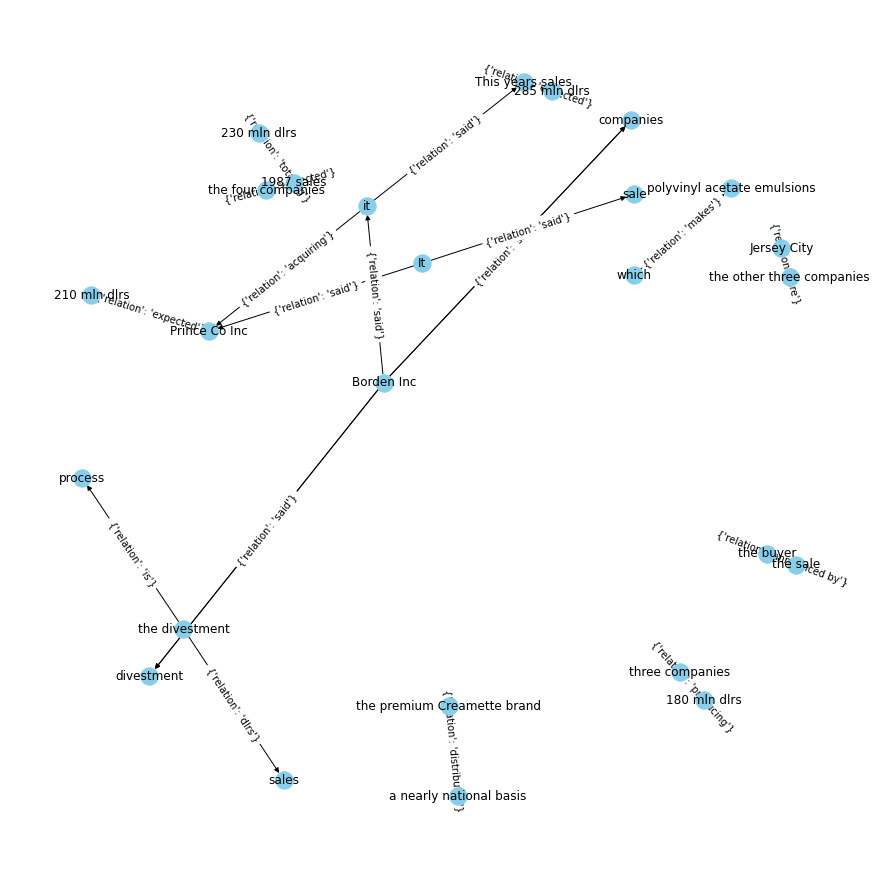

In [24]:
plot_G= plot(G)

In [33]:
edges= kg_df.rename(columns= {"source":"from", "target":"to", "relaton":"label"})

In [19]:
node= nodes.drop(['id'], axis=1)

In [20]:
node

,entity
0,divestment
1,a nearly national basis
2,three companies
3,sales
4,1987 sales
5,It
6,the other three companies
7,companies
8,polyvinyl acetate emulsions
9,process


In [39]:
new_node= node.rename(columns= {"entity":"id"})

In [28]:
def interactive_graph(G):
    g4 = net.Network(height='400px', width='50%',notebook=True,heading='Graph :)')
    g4.from_nx(G)
    g4.show_buttons(filter_=['physics'])
    g4.show('graph.html')
    disp= display(HTML('graph.html'))
    
    return disp

In [29]:
interactive_graph(G)

AttributeError: module 'networkx' has no attribute 'Graph'

jaal

In [34]:
edges

,from,relation,to
0,Borden Inc,said,it
1,it,acquiring,Prince Co Inc
2,three companies,producing,180 mln dlrs
3,Borden Inc,said,companies
4,the four companies,expected,1987 sales
5,1987 sales,totaling,230 mln dlrs
6,It,said,Prince Co Inc
7,Prince Co Inc,expected,210 mln dlrs
8,the premium Creamette brand,distributed,a nearly national basis
9,This years sales,expected,285 mln dlrs


In [13]:
#from jaal import Jaal
#from jaal.datasets import load_got
#
##load the data
#
#edge_df= kg_df["source"], kg_df["target"]
#node_df = nodes
#
## add edge labels
#edge_df.loc[:, 'source'] = edge_df.loc[:, 'target'].astype(str)
#Jaal(edge_df, node_df).plot(directed=True)
#node_df.head()

In [35]:
node

,entity
0,divestment
1,a nearly national basis
2,three companies
3,sales
4,1987 sales
5,It
6,the other three companies
7,companies
8,polyvinyl acetate emulsions
9,process


In [ ]:
kg_df

In [ ]:
# import
from jaal import Jaal
# load the data
edge_df, node_df = edges, new_node
# init Jaal and run server
Jaal(edge_df, node_df).plot()

In [ ]:
Jaal(kg_df).plot()

Well, this is not exactly what we were hoping for (still looks quite a sight though!).

It turns out that we have created a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”

Ignore this code:

In [ ]:
#G=nx.from_pandas_edgelist(kg_df[kg_df['relation']=="decides"], "source", "target", 
#                          edge_attr=True, create_using=nx.MultiDiGraph())
#
#plt.figure(figsize=(12,12))
#pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
#nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
#plt.show()